In [4]:
# designed to take in padded images and perform PCA

In [1]:
#set image path and libraries

import numpy as np
from scipy.spatial import procrustes
from skimage.io import imread, imsave, imshow
from skimage.measure import find_contours
from sklearn.decomposition import PCA
import os
from pathlib import Path
from matplotlib import pyplot as plt 
from scipy.linalg import orthogonal_procrustes


image_path = "/proj/telston_lab/projects/data/SegmentationAnalysis/10x_JR20GFP_Soft/beads_movies/movie42_track0/masks/padded"

#lists all the files that are within imagesfolder and stores them in a variable called "imagenames"
imagenames=os.listdir(image_path)
#print(imagenames)
len(imagenames)
print(imagenames)

['t47.tif', 't197.tif', 't25.tif', 't151.tif', 't209.tif', 't41.tif', 't73.tif', 't36.tif', 't166.tif', 't120.tif', 't71.tif', 't213.tif', 't126.tif', 't19.tif', 't104.tif', 't135.tif', 't93.tif', 't204.tif', 't154.tif', 't127.tif', 't169.tif', 't187.tif', 't183.tif', 't125.tif', 't101.tif', 't27.tif', 't62.tif', 't163.tif', 't192.tif', 't8.tif', 't21.tif', 't150.tif', 't44.tif', 't68.tif', 't34.tif', 't72.tif', 't158.tif', 't59.tif', 't114.tif', 't105.tif', 't7.tif', 't215.tif', 't83.tif', 't75.tif', 't159.tif', 't134.tif', 't137.tif', 't145.tif', 't17.tif', 't179.tif', 't110.tif', 't55.tif', 't24.tif', 't6.tif', 't95.tif', 't46.tif', 't165.tif', 't123.tif', 't85.tif', 't79.tif', 't40.tif', 't100.tif', 't202.tif', 't26.tif', 't196.tif', 't139.tif', 't82.tif', 't2.tif', 't170.tif', 't13.tif', 't217.tif', 't214.tif', 't199.tif', 't146.tif', 't30.tif', 't140.tif', 't63.tif', 't138.tif', 't119.tif', 't160.tif', 't91.tif', 't185.tif', 't122.tif', 't65.tif', 't117.tif', 't99.tif', 't180.tif

/nas/longleaf/rhel8/apps/anaconda/2021.11.ood/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


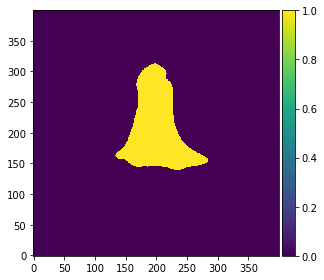

In [2]:
#first view the image we will perform procrustes on 
base=imread(image_path + '/' + imagenames[0])
tform=imread(image_path + '/' + imagenames[216])

imshow(tform, origin='lower')

In [3]:
def reduce_bd_pts(contour, target_num_pts):
    arr_ind = np.round(np.linspace(0, len(contour)-1, target_num_pts)).astype(int)
    return contour[arr_ind]

In [7]:
#find boundary pts
bound_pts1 = find_contours(base)
bound_pts2 = find_contours(tform)

#reduce number of boundary pts
rc1 = reduce_bd_pts(bound_pts1[0], 50)
rc2 = reduce_bd_pts(bound_pts2[0], 50)

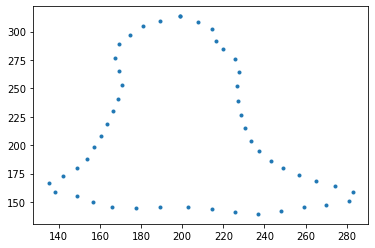

In [8]:
# plot boundary pts
plt.plot(rc2[:,1], rc2[:,0], '.')

In [9]:
#procrustes analysis
#mtx2 is transformed
mtx1, mtx2, disparity = procrustes(rc1, rc2) 
print(disparity)

0.04747231964579472


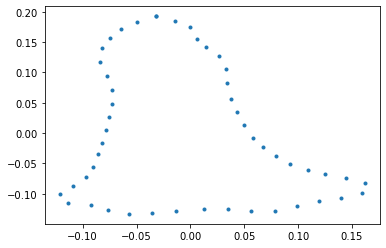

In [10]:
#view the transformed image 
plt.plot(mtx2[:,1], mtx2[:,0], '.')

In [21]:
# loop for performing procrustes analysis

#idea: one base image is the first in the images, then loop for i = 1 to i<len(imagenames); find boundary pts, perform procrustes, 
#store in a dictionary, repeat f


# code up actual pca from package
#standadize - each dimension(in this case each coordinate value) has mean 0
# 

# set base image
base=imread(image_path + '/' + imagenames[0])
bound_pts1 = find_contours(base)
rc1 = reduce_bd_pts(bound_pts1[0], 50)
transformed = {f'{imagenames[0]}':rc1} 
transformed_mtx = []
base_ptsx = []
base_ptsy = []
#print(rc1)
for i in range(0,50):
    flatten = rc1[i].flatten()
    base_ptsy.append(flatten[0])
    base_ptsx.append(flatten[1])
#print(base_ptsy)
#print(base_ptsx)
base_pts_combined = np.concatenate((base_ptsy, base_ptsx))
#print(len(pts_combined))
final_pts = base_pts_combined 
transformed_mtxx = []
transformed_mtxy = []
for i in range(1, len(imagenames)): # -1?
    tform=imread(image_path + '/' + imagenames[i])
    #find contours
    bound_pts2 = find_contours(tform)
    rc2 = reduce_bd_pts(bound_pts2[0], 50)
    mtx1, mtx2, disparity = procrustes(rc1, rc2)
    transformed[f'{imagenames[i]}'] = mtx2
    #print(mtx2)
    tform_ptsy = []
    tform_ptsx = []
    for j in range(0,50):
        flatten = mtx2[j].flatten()
        tform_ptsy.append(flatten[0])
        tform_ptsx.append(flatten[1])
    tform_pts_combined = np.concatenate((tform_ptsy, tform_ptsx))
    final_pts = np.vstack((final_pts, tform_pts_combined))
print(final_pts)
number_of_rows = final_pts.shape[0]

print(f'The number of rows in the array is: {number_of_rows}')

[[ 3.02500000e+02  2.98000000e+02  2.92000000e+02 ...  1.97500000e+02
   1.88500000e+02  1.81000000e+02]
 [ 9.96290893e-02  8.79314808e-02  7.57328572e-02 ...  2.58404850e-02
   1.06406176e-02 -2.11710873e-03]
 [ 1.44199910e-01  1.38292130e-01  1.24022692e-01 ...  8.61048745e-03
   1.10789308e-02 -6.82009995e-04]
 ...
 [ 1.58141904e-01  1.44403431e-01  1.28719663e-01 ... -3.41992472e-03
  -1.95900162e-02 -3.86780487e-02]
 [ 1.52865784e-01  1.47277078e-01  1.45468599e-01 ...  2.75957700e-02
   4.76925514e-03 -1.84746010e-02]
 [ 1.92707224e-01  1.82913871e-01  1.71663367e-01 ...  1.17117551e-04
  -1.44882154e-02 -3.18299340e-02]]
The number of rows in the array is: 217


't39.tif'

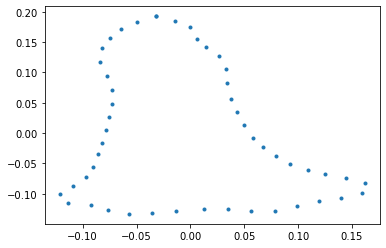

In [12]:
#check the transformed images 
transformed[imagenames[5]]
plt.plot(transformed[imagenames[216]][:,1], transformed[imagenames[216]][:,0], '.')

imagenames[216]

In [34]:
#perform preliminary pca
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
print(pca.fit(final_pts))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

PCA(n_components=20)
[9.99994948e-01 2.66968160e-06 1.00083857e-06 4.16400381e-07
 3.81505762e-07 1.45381866e-07 9.91543866e-08 6.86771024e-08
 5.77098020e-08 2.75377415e-08 2.31732451e-08 2.01296942e-08
 1.97311871e-08 1.80612116e-08 1.67788737e-08 1.08890819e-08
 8.88053954e-09 7.26032393e-09 5.66559436e-09 5.11907034e-09]
0.9999999510289721


In [25]:
#finding boundary points 
#print(mtx1)
bound_pts_1 = find_contours(image1)
bound_pts_2 = find_contours(image2)
print(bound_pts_1)

#origin = 'lower' for imshow 
#we can use boudnary points then scipy.procrustes 
#basically we need a reproducible number of boundary points no matter the cell ... opencv? 
#ramer douglas tucker library 

#index 0th position and take vampire fxn and use for the fixed number of boundary points... then continue with 
#first column is y second column is x 
# vampire outputs y x which means need to change when i plot it 
#find boundary poins vampire function to reduct number of boundary points
#scipy to do procrustes and align to first image then goal is to have transformed coordinates saved somewhere like a list of arrays
# or multi-diensional array or something 
# boundary point reduction function 

mtx1, mtx2, disparity = procrustes(image1, image2)
print(disparity)

NameError: name 'image1' is not defined

In [46]:
#implementing pca 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

#step 1: normalize the data 
normd = data - data.mean()
normd.head()



,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,-0.791304,2.643478,11.604348,-22.891304,-7.165217
BALTIMORE,1.208696,-0.856522,5.204348,-28.391304,4.534783
BOSTON,4.408696,8.943478,-0.895652,1.008696,10.834783
BUFFALO,-2.491304,-5.256522,3.004348,15.408696,2.434783
CHICAGO,1.408696,-5.156522,0.404348,2.908696,2.434783


In [47]:
cov_mat = normd.cov()
cov_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,6.284466,12.910968,5.719051,1.310375,7.285138
Burger,12.910968,57.077115,17.507530,22.691877,36.294783
Milk,5.719051,17.507530,48.305889,-0.275040,13.443478
Oranges,1.310375,22.691877,-0.275040,202.756285,38.762411
Tomatoes,7.285138,36.294783,13.443478,38.762411,57.800553


In [48]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print("eig_vectors", eig_vectors)
print("...............")
print("eig_valuess", eig_values)

eig_vectors [[-0.02848905 -0.16532108 -0.96716354 -0.18972574  0.02135748]
 [-0.2001224  -0.63218494  0.24877074 -0.65862454  0.25420475]
 [-0.0416723  -0.44215032  0.03606094  0.10765906 -0.88874949]
 [-0.93885906  0.31435473 -0.01521357 -0.06904699 -0.12135003]
 [-0.27558389 -0.52791603 -0.03429221  0.71684022  0.36100184]]
...............
eig_valuess [218.99867893  91.72316894   3.02922934  20.81054128  37.66268981]


In [49]:
e_indices = np.argsort(eig_values)[::-1]
eigenvectors_sorted = eig_vectors[:,e_indices]
eigenvectors_sorted

array([[-0.02848905, -0.16532108,  0.02135748, -0.18972574, -0.96716354],
       [-0.2001224 , -0.63218494,  0.25420475, -0.65862454,  0.24877074],
       [-0.0416723 , -0.44215032, -0.88874949,  0.10765906,  0.03606094],
       [-0.93885906,  0.31435473, -0.12135003, -0.06904699, -0.01521357],
       [-0.27558389, -0.52791603,  0.36100184,  0.71684022, -0.03429221]])

In [50]:
variance_explained = []
for i in eig_values:
    variance_explained.append((i/sum(eig_values))*100)
print(variance_explained)

[58.83513624595474, 24.64190728275136, 0.8138182470747176, 5.590860354378642, 10.11827786984054]


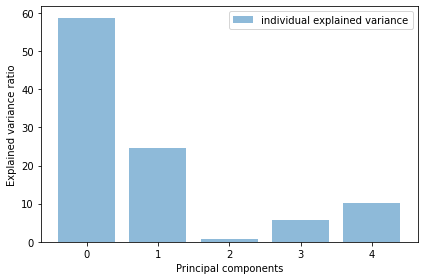

In [53]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
plt.bar(range(5), variance_explained, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.tight_layout()

In [54]:
import pandas as pd
df = pd.DataFrame(final_pts)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,302.500000,298.000000,292.000000,286.000000,274.000000,265.500000,258.000000,248.000000,235.000000,221.000000,...,228.500000,232.000000,231.500000,227.500000,227.500000,221.000000,210.000000,197.500000,188.500000,181.000000
1,0.099629,0.087931,0.075733,0.062268,0.048451,0.035339,0.021374,0.010030,-0.000608,-0.011245,...,0.106976,0.089861,0.071038,0.052980,0.037248,0.025698,0.033414,0.025840,0.010641,-0.002117
2,0.144200,0.138292,0.124023,0.132366,0.133151,0.123063,0.102104,0.081981,0.060186,0.040900,...,0.033158,0.019725,0.007964,-0.002961,-0.009705,-0.003877,0.003626,0.008610,0.011079,-0.000682
3,0.137708,0.121301,0.101418,0.079879,0.057896,0.037990,0.018806,0.004686,0.007508,0.007132,...,0.119212,0.106002,0.085373,0.069973,0.056626,0.035320,0.016137,0.016672,0.002295,-0.019244
4,0.115408,0.101316,0.083959,0.067888,0.053301,0.035944,0.021356,0.006720,-0.006877,-0.020722,...,0.122830,0.105522,0.088214,0.070063,0.052359,0.034507,0.019673,0.008152,-0.001686,-0.016273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.153773,0.142646,0.133003,0.126559,0.110240,0.086225,0.073384,0.071252,0.059152,0.042416,...,0.096740,0.102024,0.088904,0.069618,0.051074,0.033365,0.013709,-0.005346,-0.020181,-0.043176
213,0.174714,0.151921,0.130261,0.106879,0.085219,0.061247,0.039984,0.022311,0.021619,0.028409,...,0.053896,0.075257,0.075796,0.052610,0.030510,0.018797,0.001077,-0.003209,-0.011285,-0.034274
214,0.158142,0.144403,0.128720,0.110618,0.089611,0.073448,0.069477,0.062574,0.043486,0.029835,...,0.087643,0.090528,0.070467,0.051379,0.038613,0.022936,0.004381,-0.003420,-0.019590,-0.038678
215,0.152866,0.147277,0.145469,0.135955,0.117894,0.104739,0.094947,0.077999,0.065527,0.052917,...,0.048015,0.065525,0.088775,0.105305,0.092150,0.066662,0.043273,0.027596,0.004769,-0.018475


In [56]:
normd = df - df.mean()
normd.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,300.951971,296.485999,290.529425,284.572776,272.643826,264.198094,256.748260,246.809536,233.882356,219.959634,...,227.375532,230.866678,230.378679,226.407097,226.416037,219.956803,209.019315,196.588357,187.642294,180.193720
1,-1.448400,-1.426069,-1.394843,-1.364956,-1.307723,-1.266566,-1.230366,-1.180434,-1.118252,-1.051611,...,-1.017492,-1.043461,-1.050282,-1.039923,-1.046715,-1.017499,-0.947271,-0.885803,-0.847065,-0.808397
2,-1.403830,-1.375709,-1.346553,-1.294858,-1.223022,-1.178843,-1.149636,-1.108483,-1.057458,-0.999466,...,-1.091310,-1.113597,-1.113357,-1.095864,-1.093668,-1.047074,-0.977059,-0.903033,-0.846627,-0.806962
3,-1.410321,-1.392700,-1.369158,-1.347345,-1.298277,-1.263916,-1.232934,-1.185778,-1.110136,-1.033233,...,-1.005256,-1.027320,-1.035948,-1.022930,-1.027337,-1.007876,-0.964548,-0.894972,-0.855411,-0.825524
4,-1.432621,-1.412685,-1.386616,-1.359336,-1.302873,-1.265962,-1.230384,-1.183744,-1.124521,-1.061088,...,-1.001639,-1.027800,-1.033107,-1.022839,-1.031604,-1.008690,-0.961012,-0.903491,-0.859392,-0.822553


In [57]:
cov_matx = normd.cov()
cov_matx

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,421.257010,415.005776,406.668053,398.330237,381.632716,369.810814,359.382909,345.471182,327.376368,307.888051,...,318.267700,323.154531,322.471549,316.912443,316.925059,307.883801,292.574060,275.173803,262.651524,252.225372
1,415.005776,408.847368,400.633413,392.419357,375.969635,364.323159,354.049997,340.344711,322.518399,303.319262,...,313.544605,318.358929,317.686112,312.209531,312.221991,303.314932,288.232410,271.090392,258.753958,248.482551
2,406.668053,400.633413,392.584527,384.535523,368.416292,357.003799,346.937034,333.507093,316.038909,297.225482,...,307.245175,311.962777,311.303497,305.936973,305.949208,297.221126,282.441651,265.644053,253.555485,243.490456
3,398.330237,392.419357,384.535523,376.651594,360.862878,349.684376,339.824006,326.669413,309.559356,291.131640,...,300.945691,305.566579,304.920835,299.664358,299.676362,291.127251,276.650815,260.197634,248.356931,238.498279
4,381.632716,375.969635,368.416292,360.862878,345.736059,335.026174,325.579142,312.975969,296.583125,278.927858,...,288.330294,292.757497,292.138846,287.102738,287.114262,278.923536,265.053941,249.290454,237.946103,228.500723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,307.883801,303.314932,297.221126,291.127251,278.923536,270.283268,262.661834,252.494193,239.269269,225.025870,...,232.612769,236.184381,235.685189,231.622175,231.631363,225.023350,213.833853,201.116465,191.964271,184.344099
96,292.574060,288.232410,282.441651,276.650815,265.053941,256.843307,249.600846,239.938796,227.371489,213.836349,...,221.045861,224.439847,223.965467,220.104488,220.113229,213.833853,203.200844,191.115879,182.418792,175.177551
97,275.173803,271.090392,265.644053,260.197634,249.290454,241.568114,234.756372,225.668943,213.849046,201.118887,...,207.899639,211.091737,210.645547,207.014176,207.022380,201.116465,191.115879,179.749726,171.569918,164.759352
98,262.651524,258.753958,253.555485,248.356931,237.946103,230.575171,224.073401,215.399507,204.117486,191.966639,...,198.438833,201.485640,201.059736,197.593607,197.601428,191.964271,182.418792,171.569918,163.762415,157.261802


In [65]:
eig_values, eig_vectors = np.linalg.eig(cov_matx)
print("eig_vectors", eig_vectors)
print("...............")
print("eig_valuess", eig_values)


eig_vectors [[ 0.14344926  0.05007348 -0.05716211 ...  0.01009468  0.11264694
   0.03389292]
 [ 0.14132054  0.06332967 -0.03008329 ...  0.012965   -0.10518071
  -0.02336314]
 [ 0.13848133  0.07281944 -0.00134604 ...  0.0256612  -0.11156654
  -0.02471301]
 ...
 [ 0.09370415 -0.01837353  0.02636826 ...  0.19609545  0.00344848
   0.0018971 ]
 [ 0.08943999 -0.0221251   0.05985229 ...  0.20153697  0.00071174
   0.00131859]
 [ 0.08588961 -0.02000926  0.08437724 ...  0.20996105 -0.16380829
   0.68993362]]
...............
eig_valuess [ 2.04715226e+04  5.46527235e-02  2.04887930e-02  8.52439288e-03
  7.81004329e-03  2.97620319e-03  2.02985152e-03  1.40593196e-03
  1.18141349e-03  5.63742348e-04  4.74394007e-04  4.12087573e-04
  4.03929483e-04  3.69742369e-04  3.43490828e-04  2.22917212e-04
  1.81799085e-04  1.48630637e-04  1.15983929e-04  1.04795694e-04
  1.00685684e-04  8.80295383e-05  7.92077254e-05  7.41833325e-05
  6.56247766e-05  5.76379980e-05  4.79638253e-05  4.35087165e-05
  3.91739656e

In [79]:
e_indices = np.argsort(eig_values)[::-1]
eigenvectors_sorted = eig_vectors[:,e_indices]
eigenvectors_sorted

# dot products not multiplying 

array([[ 1.43449258e-01,  5.00734789e-02, -5.71621112e-02, ...,
         1.12646937e-01,  3.38929232e-02, -7.13166933e-01],
       [ 1.41320545e-01,  6.33296656e-02, -3.00832931e-02, ...,
        -1.05180706e-01, -2.33631354e-02, -2.22111142e-02],
       [ 1.38481332e-01,  7.28194432e-02, -1.34604425e-03, ...,
        -1.11566538e-01, -2.47130055e-02, -2.27098001e-02],
       ...,
       [ 9.37041467e-02, -1.83735285e-02,  2.63682589e-02, ...,
         3.44848095e-03,  1.89710279e-03,  1.47892557e-02],
       [ 8.94399869e-02, -2.21250999e-02,  5.98522868e-02, ...,
         7.11737926e-04,  1.31858865e-03,  1.45764157e-02],
       [ 8.58896094e-02, -2.00092622e-02,  8.43772377e-02, ...,
        -1.63808294e-01,  6.89933624e-01,  1.81929652e-02]])

In [80]:
variance_explained = []
for i in eig_values:
    variance_explained.append((i/sum(eig_values))*100)
print(variance_explained)

[99.99949484529347, 0.0002669681603651032, 0.00010008385709508636, 4.164003806134764e-05, 3.815057618511211e-05, 1.4538186564091485e-05, 9.91543866037212e-06, 6.867710238492908e-06, 5.770980199497141e-06, 2.7537741555301496e-06, 2.317324506122555e-06, 2.0129694234708116e-06, 1.9731187073544854e-06, 1.806121154840889e-06, 1.677887371351973e-06, 1.0889081865721446e-06, 8.880539552394676e-07, 7.260323938442517e-07, 5.665594363017288e-07, 5.119070334699282e-07, 4.918304170492376e-07, 4.300075529493615e-07, 3.869146746832661e-07, 3.62371471227064e-07, 3.205645531855446e-07, 2.8155065851367877e-07, 2.3429416498939616e-07, 2.1253180542973258e-07, 1.9135737198937327e-07, 1.7952567251149907e-07, 1.675287562116314e-07, 1.3063601274362954e-07, 1.2396868416477552e-07, 1.1107948332544954e-07, 8.934734070104469e-08, 8.303954700949894e-08, 7.884844319169967e-08, 7.136833333266382e-08, 6.72936056104371e-08, 5.673443565147272e-08, 5.303717442816323e-08, 5.164919182738393e-08, 4.558372766991517e-08, 4.4

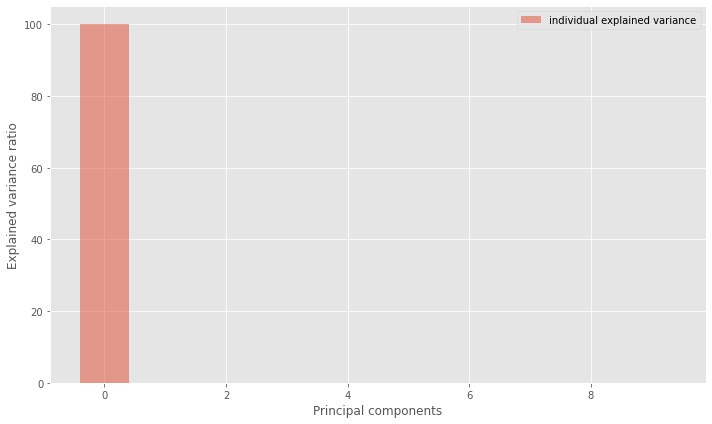

In [82]:
import matplotlib.pyplot as plt

# score is shape 100 transformed coordinates.....score add back means 
# vampire subtracted mean twice 
# score is transformed data 

i = 0
variance_cut = []

while i < 10:
    variance_cut.append(variance_explained[i])
    i += 1

with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 6))
    plt.bar(range(10), variance_cut, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend()
    plt.tight_layout()

plt.show()


100


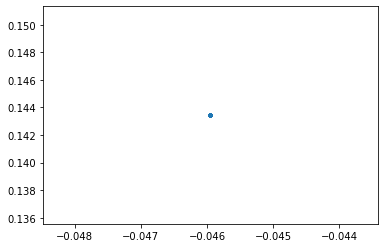

In [93]:
#transformed[imagenames[5]]
#plt.plot(transformed[imagenames[216]][:,1], transformed[imagenames[216]][:,0], '.')

#imagenames[216]
i=0
j=49
p_one = []
princip_one = eigenvectors_sorted[0]
print(len(princip_one))
while i < 50:
    y = princip_one[0]
    x = princip_one[50]
    p_one.append([y,x])
    i += 1
    j += 1
#first 50 are y second 50 are x 
p_one = np.array(p_one)
plt.plot(p_one[:,1], p_one[:,0], '.')
#trasnspose of eigenvector

In [95]:
final = np.empty((0, 2))  # Initialize an empty array to store the final points

# Assuming you have a loop iterating over j
for j in range(len(eigenvectors_sorted[0])):
    flatten = eigenvectors_sorted[0][j].flatten()

    # Append the original shape (2,) array to the final_pts array
    final = np.vstack((final, flatten.reshape(1, -1)))

# Print the final_pts array
print(final)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1